In [66]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))
import seaborn
import seaborn as sns
print("seaborn version: {}". format(seaborn.__version__))


Python version: 3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:21:23) [MSC v.1916 32 bit (Intel)]
pandas version: 1.1.1
matplotlib version: 3.3.3
NumPy version: 1.19.1
SciPy version: 1.5.2
IPython version: 7.19.0
scikit-learn version: 0.23.2
seaborn version: 0.11.1


In [67]:
df = pd.read_csv('diabetes.csv')

In [68]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.7 KB


In [70]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


#### here Glucose,Bloodpreesure,skinthickness,insulin,BmI have zero as the minimum value
#### and it is not possible tio become zero.we can consider those zeros as missing values

In [71]:
dfc = df.copy()

In [72]:
dfc[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfc[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [73]:
dfc.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

we can see 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' have nulls and we should manage nulls

<AxesSubplot:>

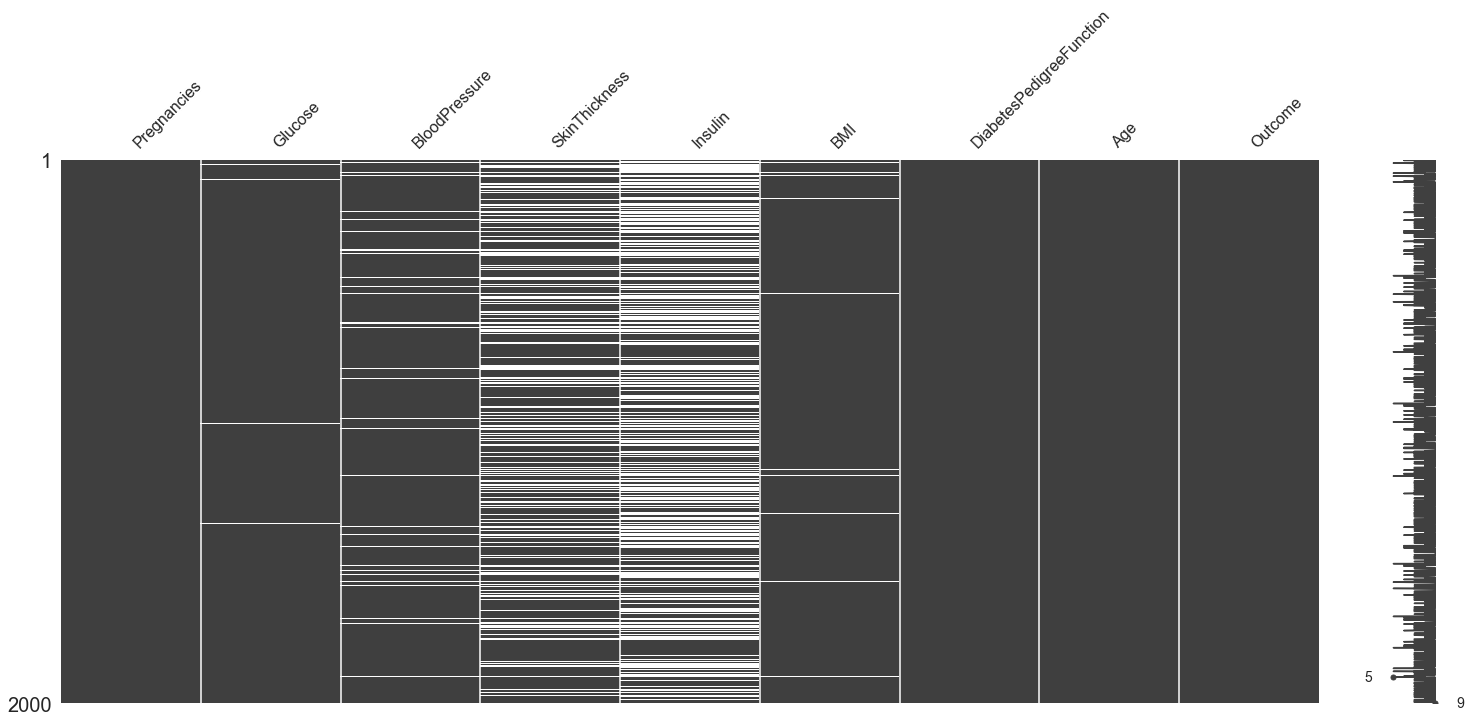

In [75]:
import missingno as ms
data = dfc
ms.matrix(data)

##### fill missing values of Glucose

here it has just 13 missing values

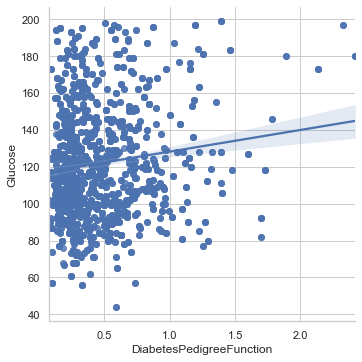

In [76]:
sns.set_theme(style="whitegrid")
sns.lmplot(data = dfc, x = "DiabetesPedigreeFunction", y = "Glucose",)
plt.show()

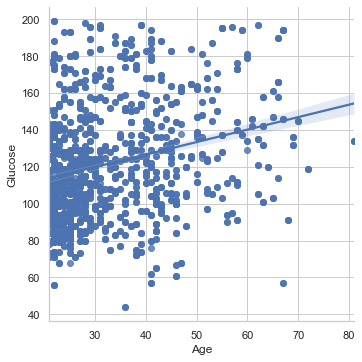

In [77]:
sns.set_theme(style="whitegrid")
sns.lmplot(data = dfc, x = "Age", y = "Glucose",)
plt.show()

we can say there is no any significant relationship among other featurs with Glucose

In [78]:
dfc.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121738,0.202942,0.104570,0.078544,0.011367,-0.025453,0.539457,0.224437
Glucose,0.121738,1.000000,0.203892,0.246639,0.560751,0.234641,0.124303,0.260340,0.489884
BloodPressure,0.202942,0.203892,1.000000,0.246267,0.098560,0.266127,0.012259,0.329282,0.179094
SkinThickness,0.104570,0.246639,0.246267,1.000000,0.204235,0.634720,0.104525,0.176158,0.245995
Insulin,0.078544,0.560751,0.098560,0.204235,1.000000,0.252098,0.127686,0.145981,0.291673
BMI,0.011367,0.234641,0.266127,0.634720,0.252098,1.000000,0.144132,0.018672,0.283522
DiabetesPedigreeFunction,-0.025453,0.124303,0.012259,0.104525,0.127686,0.144132,1.000000,0.026569,0.155459
Age,0.539457,0.260340,0.329282,0.176158,0.145981,0.018672,0.026569,1.000000,0.236509
Outcome,0.224437,0.489884,0.179094,0.245995,0.291673,0.283522,0.155459,0.236509,1.000000


we can see glucose and insulin has a better relationship

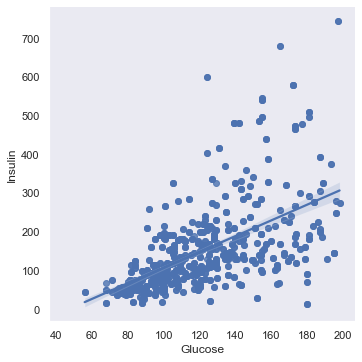

In [79]:
sns.set_theme(style='dark')
sns.lmplot(data=dfc, x='Glucose',y='Insulin')
plt.show()

it has significant relationship . so i suppos to use mean values of glucose to fill those 13 points

In [80]:
dfc['Glucose'] = dfc['Glucose'].fillna(dfc['Glucose'].mean())

In [81]:
dfc['Glucose'].isnull().sum()

0

now we fill insulin missing values by the help of glucose

In [82]:
from sklearn.linear_model import LinearRegression
df_reg = dfc[['Glucose','Insulin']]
test_df_reg = df_reg[df_reg["Insulin"].isnull()]
df_reg.dropna(inplace=True)

<ipython-input-82-5815a96e66dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg.dropna(inplace=True)


In [83]:
y_train = df_reg['Insulin']
x_train = df_reg.drop('Insulin',axis=1)
x_test = test_df_reg.drop('Insulin',axis=1)

In [84]:
model = LinearRegression()

In [85]:
model.fit(x_train,y_train)

LinearRegression()

In [86]:
y_pred = model.predict(x_test)

In [87]:
y_df= pd.DataFrame(y_pred)

In [88]:
y_df.index = dfc[dfc['Insulin'].isnull()].index

In [89]:
dfc.loc[dfc['Insulin'].isnull(),'Insulin'] = y_df[0]

In [90]:
dfc['Insulin'].isnull().sum()

0

##### handle BMI

In [91]:
dfc['BMI'] = dfc['BMI'].fillna(dfc['BMI'].mean())

<AxesSubplot:>

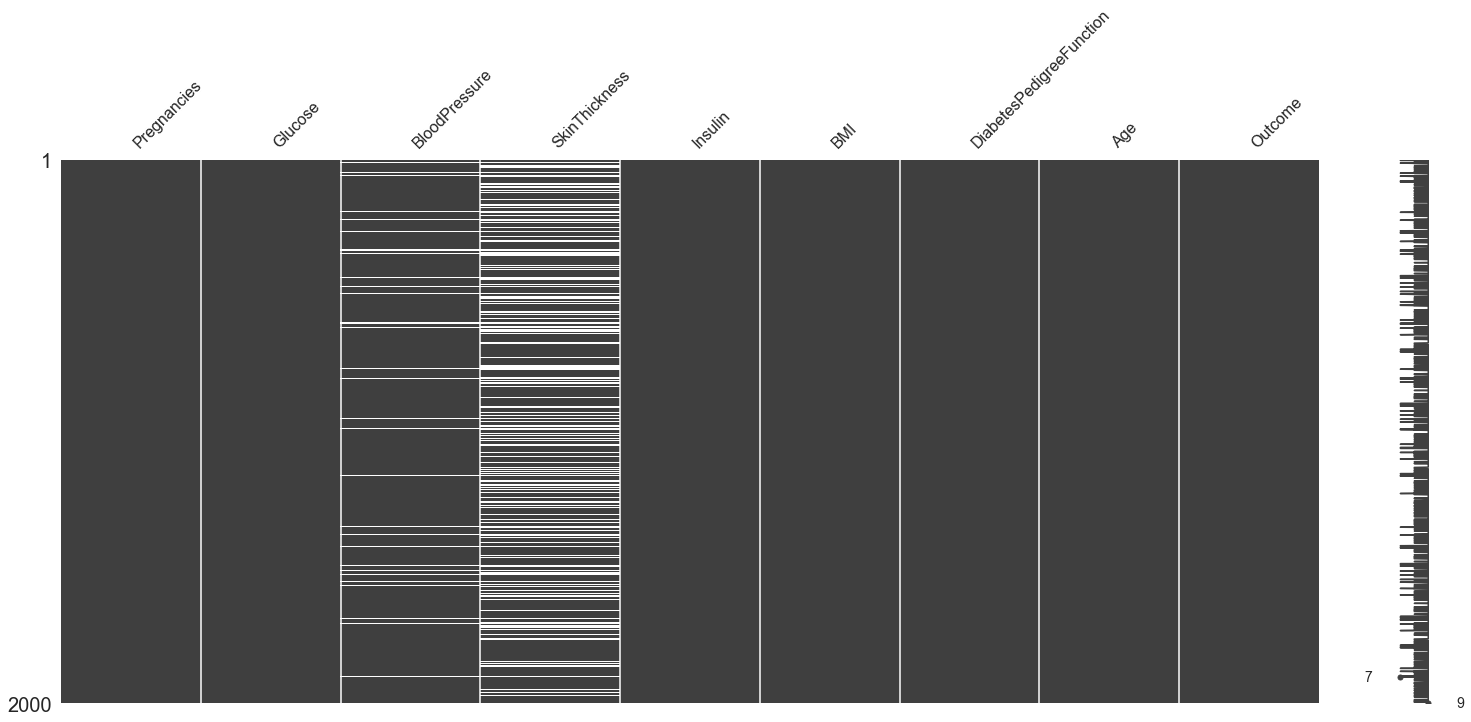

In [92]:
ms.matrix(dfc)

##### handle skinthickness

In [93]:
data = dfc[['BMI','SkinThickness']]
test_data = data[data['SkinThickness'].isnull()]
data.dropna(inplace=True)

<ipython-input-93-f26e826214cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [94]:
y_train = data['SkinThickness']
x_train = data.drop('SkinThickness',axis=1)

In [95]:
x_test = test_data.drop('SkinThickness',axis=1)

In [96]:
from sklearn.linear_model import LinearRegression



In [97]:
model = LinearRegression()

In [98]:
model.fit(x_train,y_train)

LinearRegression()

In [99]:
y_pred = model.predict(x_test)

In [100]:
y_df = pd.DataFrame(y_pred)

In [101]:
y_df.index = dfc[dfc['SkinThickness'].isnull()].index

In [102]:
dfc.loc[dfc['SkinThickness'].isnull(),'SkinThickness'] = y_df[0]

<AxesSubplot:>

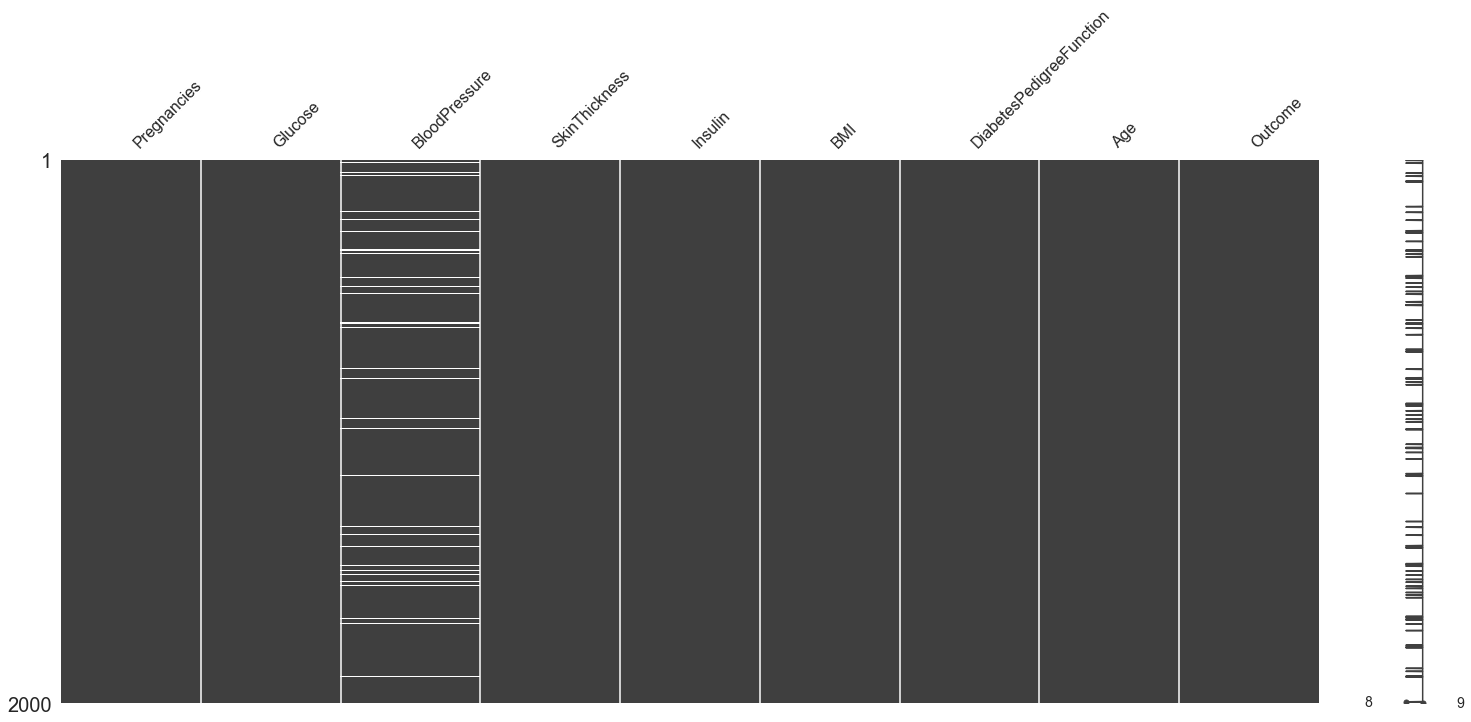

In [103]:
ms.matrix(dfc)

In [104]:
dfc['BloodPressure'] = dfc['BloodPressure'].fillna(dfc['BloodPressure'].mean())

<AxesSubplot:>

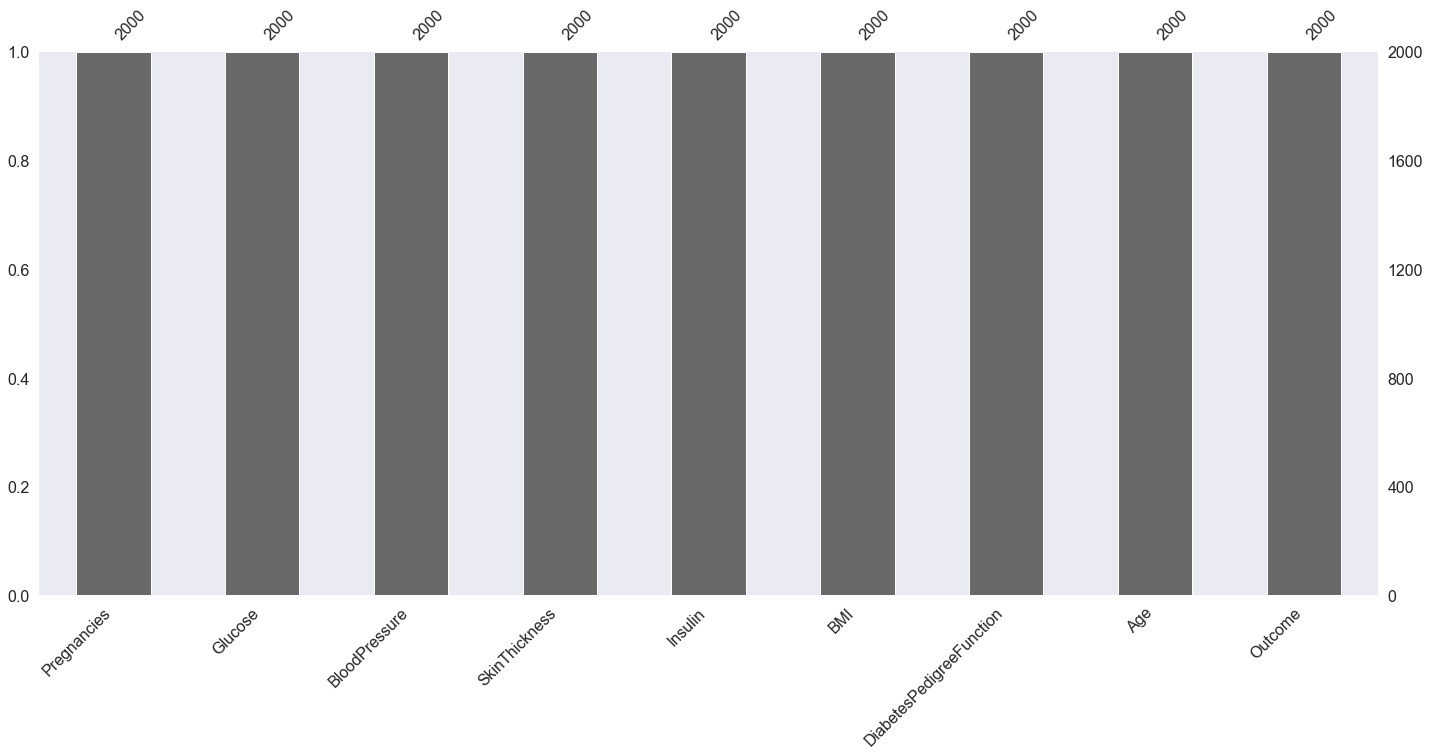

In [105]:
ms.bar(dfc)

all missing values managed 

In [106]:
# check whether it is an imbalance or not

x = dfc['Outcome'].value_counts()

In [41]:
x

0    1316
1     684
Name: Outcome, dtype: int64

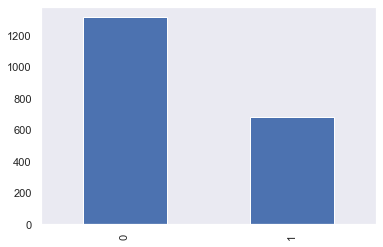

In [107]:

p=dfc.Outcome.value_counts().plot(kind="bar")

this is an imbalance dataset

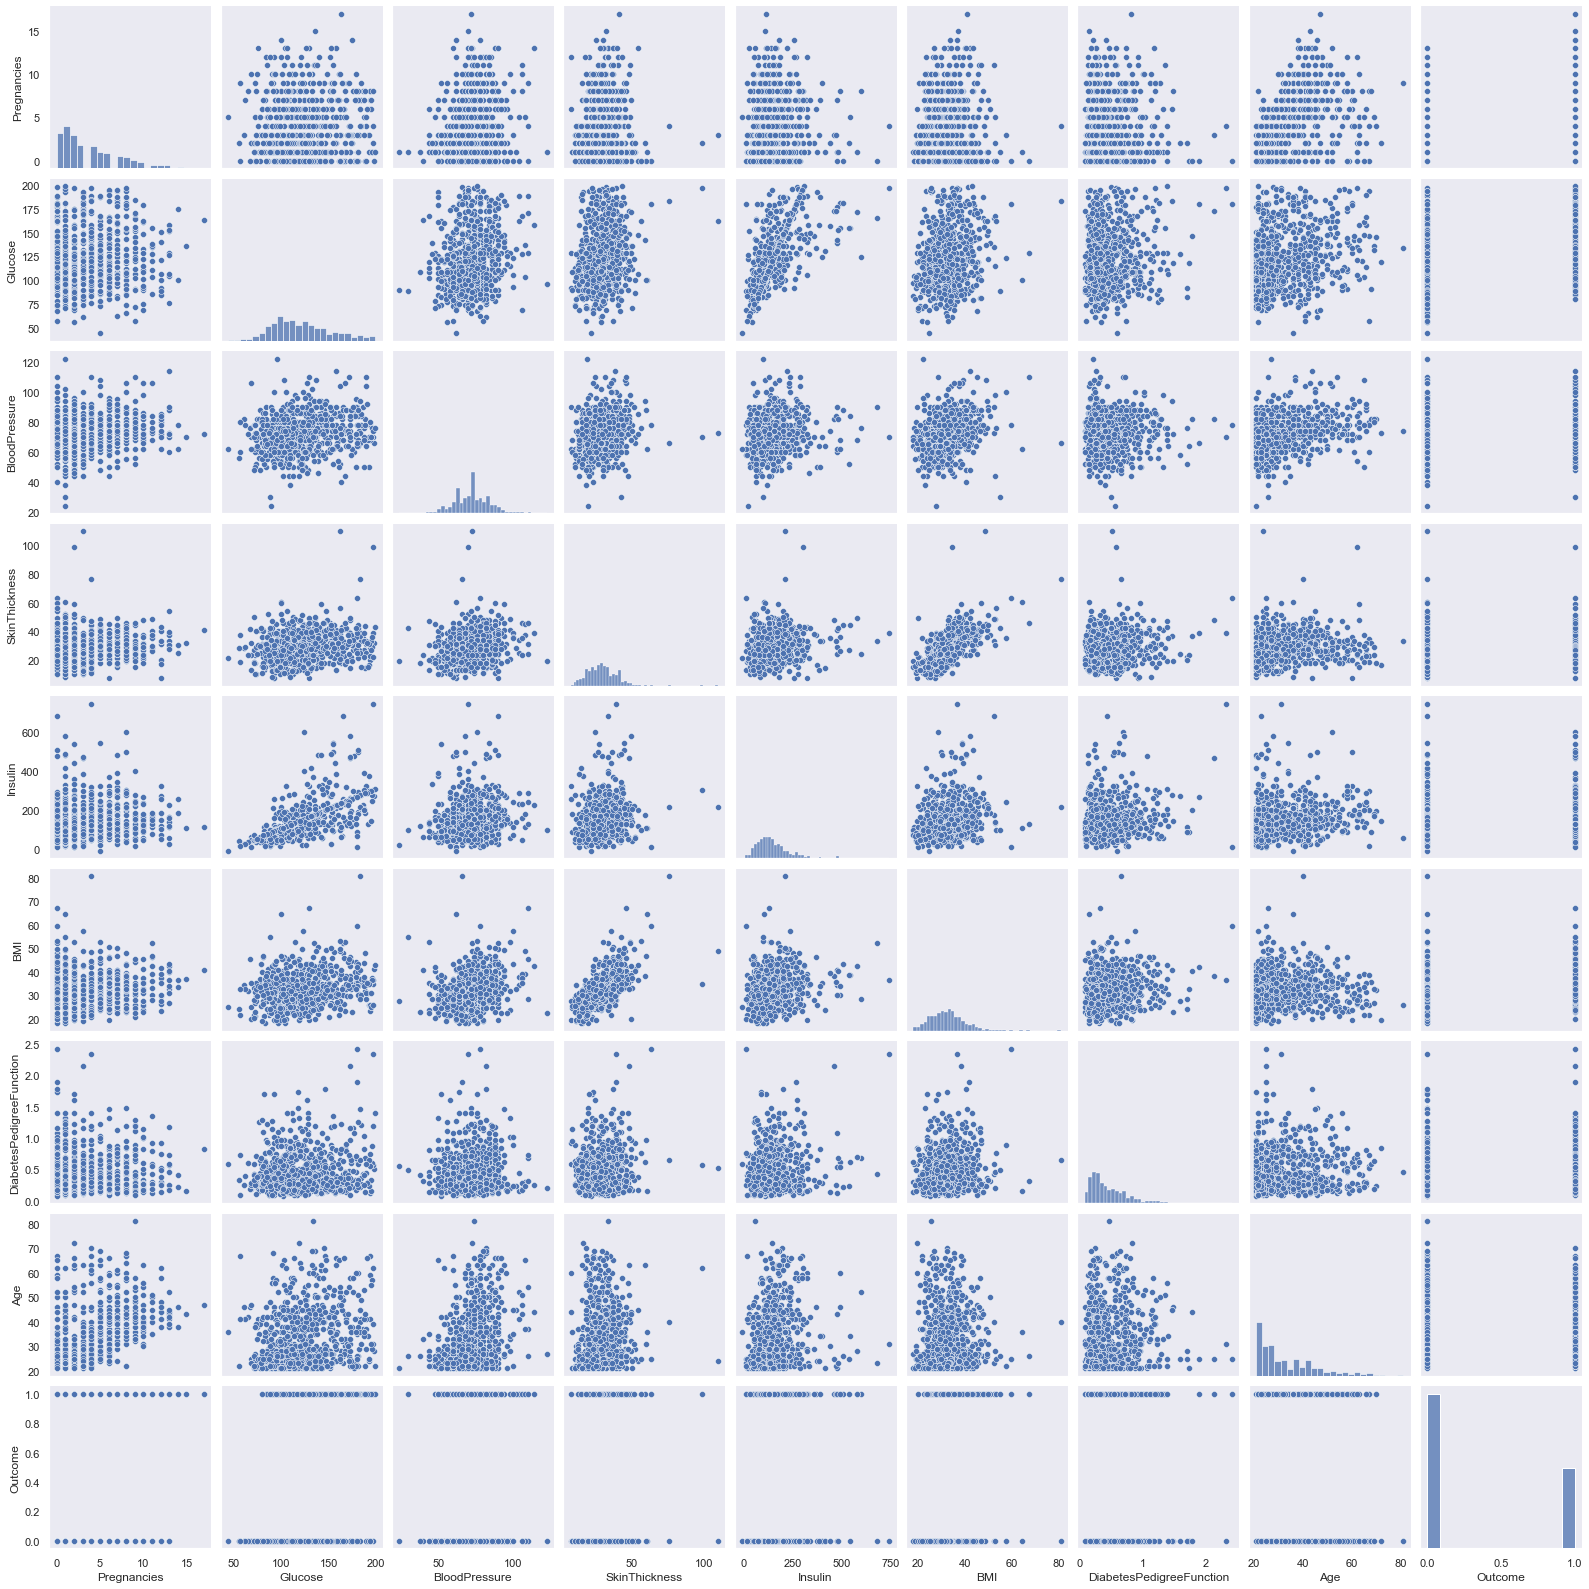

In [108]:
sns.pairplot(dfc)
plt.show()

<AxesSubplot:>

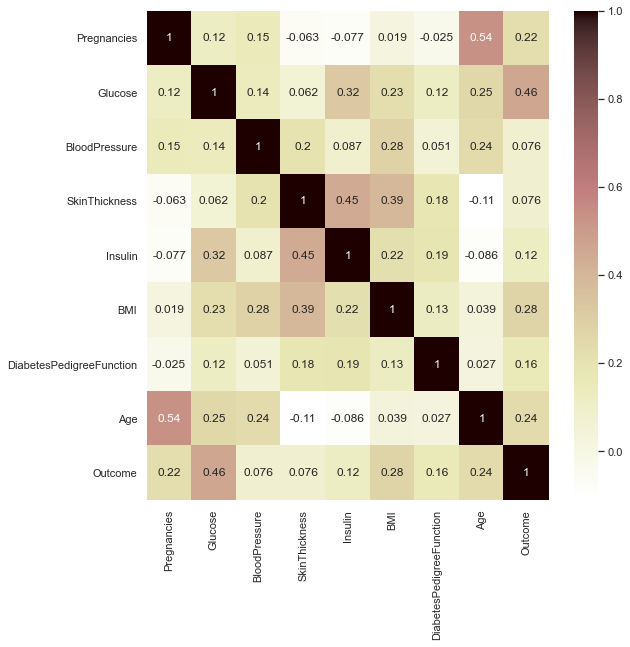

In [109]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,cmap='pink_r')

##### data transformation

In [45]:
features = [x for x in dfc.columns if x != 'Outcome']

In [46]:
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

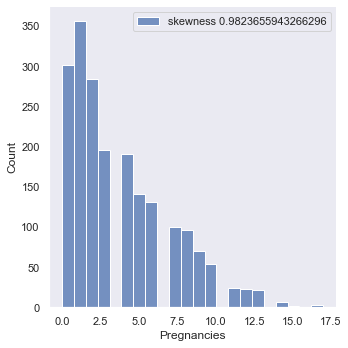

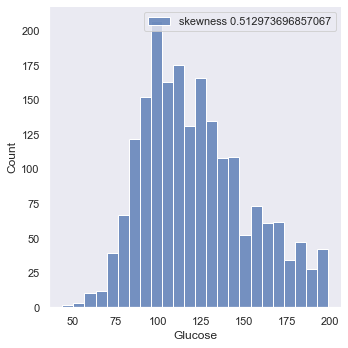

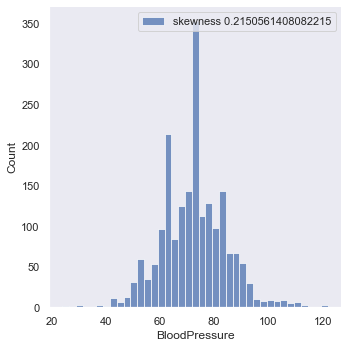

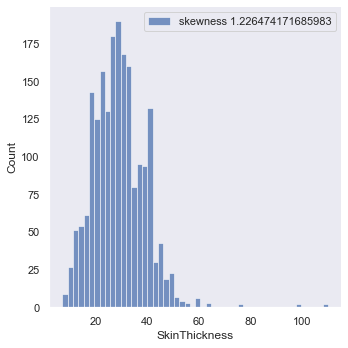

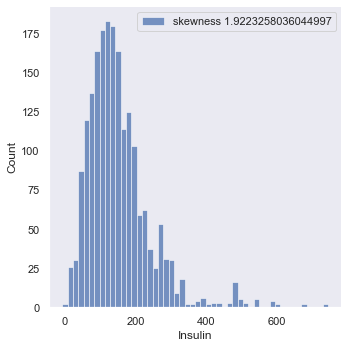

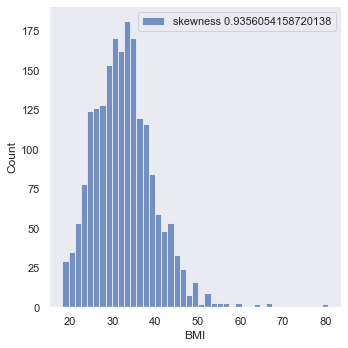

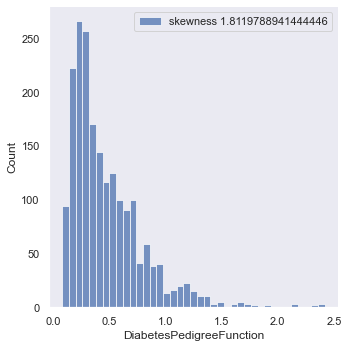

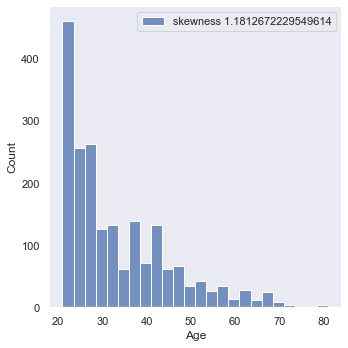

In [47]:
for i in features:
    sns.set_theme(style='dark')
    sns.displot(data= dfc,x=i,label='skewness {}'.format(dfc[i].skew()))
    plt.legend(loc='best')
    plt.show()

In [48]:
# all features are right skewed ..

In [49]:
def plot_data(df,x,y):
    plt.figure(figsize=(10,6))
    #plt.subplot(1,2,1)
    sns.displot(data=df, x=x,label='skewness {}'.format(df[x].skew()))
    plt.legend(loc='best')
    plt.show()
    #plt.subplot(1,2,2)
    sns.displot(data=df, x=y,label='skewness {}'.format(df[y].skew()))
    plt.legend(loc='best')
    plt.show()

<Figure size 720x432 with 0 Axes>

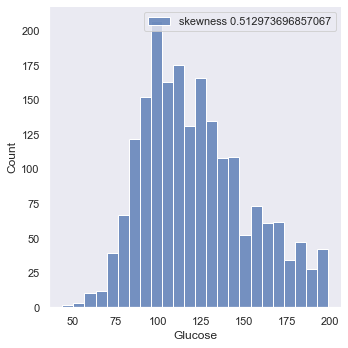

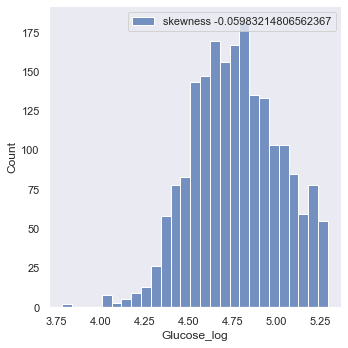

In [50]:
dfc['Glucose_log'] = np.log(dfc['Glucose'])
plot_data(dfc,'Glucose','Glucose_log')

In [51]:
dfc.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_log'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

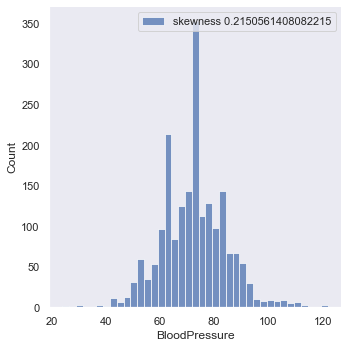

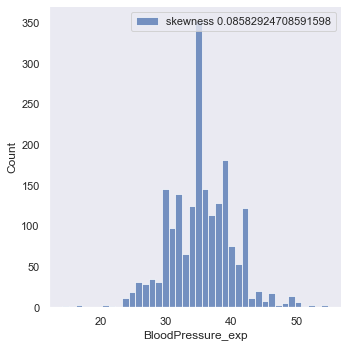

In [52]:
dfc['BloodPressure_exp']=(dfc.BloodPressure)**(1/1.2)
plot_data(dfc,'BloodPressure','BloodPressure_exp')

In [53]:
dfc.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Glucose_log',
       'BloodPressure_exp'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

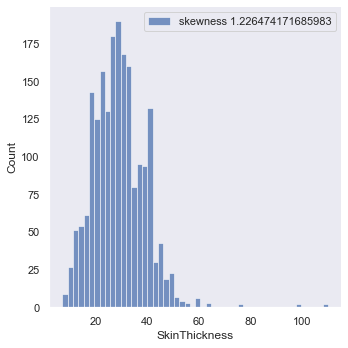

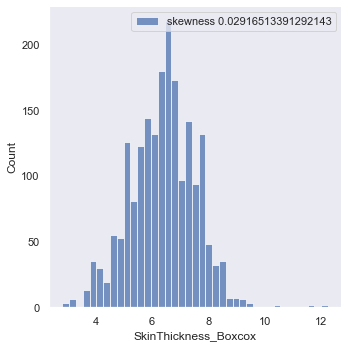

In [54]:
import scipy.stats as stat
dfc['SkinThickness_Boxcox'],parameters=stat.boxcox(dfc['SkinThickness'])
plot_data(dfc,'SkinThickness','SkinThickness_Boxcox')

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 720x432 with 0 Axes>

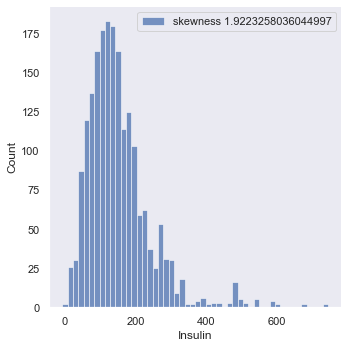

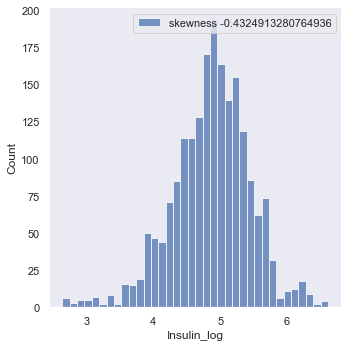

In [55]:
dfc['Insulin_log'] =np.log(dfc['Insulin'])
plot_data(dfc,'Insulin','Insulin_log')

<Figure size 720x432 with 0 Axes>

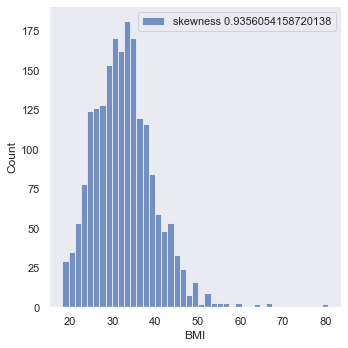

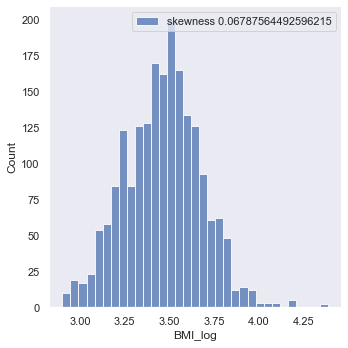

In [56]:
dfc['BMI_log'] =np.log(dfc['BMI'])
plot_data(dfc,'BMI','BMI_log')

<Figure size 720x432 with 0 Axes>

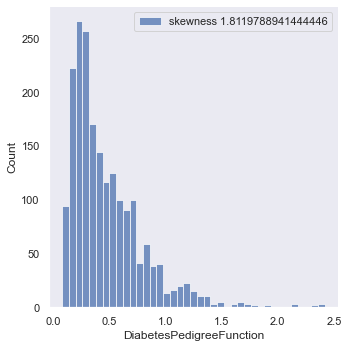

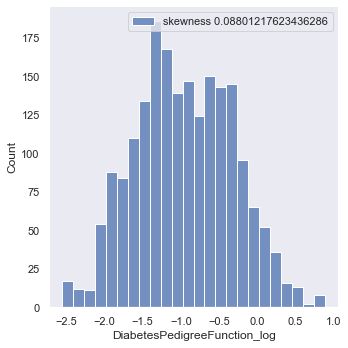

In [57]:
dfc['DiabetesPedigreeFunction_log'] =np.log(dfc['DiabetesPedigreeFunction'])
plot_data(dfc,'DiabetesPedigreeFunction','DiabetesPedigreeFunction_log')


<Figure size 720x432 with 0 Axes>

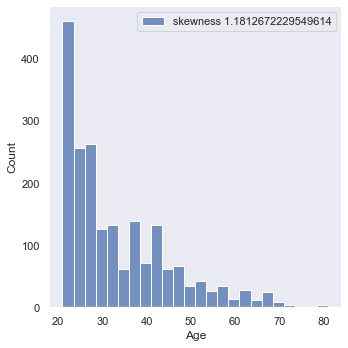

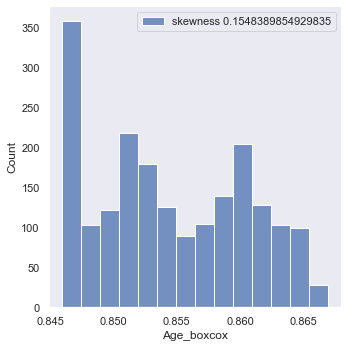

In [58]:
dfc['Age_boxcox'],parameters =stat.boxcox(dfc['Age'])
plot_data(dfc,'Age','Age_boxcox')

In [110]:
dfc.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
dfc.drop(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],axis=1,inplace=True)

In [61]:
dfc.columns

Index(['Pregnancies', 'Outcome', 'Glucose_log', 'BloodPressure_exp',
       'SkinThickness_Boxcox', 'Insulin_log', 'BMI_log',
       'DiabetesPedigreeFunction_log', 'Age_boxcox'],
      dtype='object')

In [111]:
dfc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,184.175554,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,40.246842,198.393573,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.000000,55.000000,29.7,0.370,33,0
1996,8,179.0,72.000000,42.000000,130.000000,32.7,0.719,36,1
1997,6,85.0,78.000000,27.420789,76.524840,31.2,0.382,42,0
1998,0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26,1


In [63]:
dfc['Insulin_log'] = dfc['Insulin_log'].fillna(dfc['Insulin_log'].mean())

In [64]:
dfc['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

it is a imbalance data set

In [112]:
dfc.to_csv('model.csv')
